# Введение в Машинное обучение

## Высшая Школа Цифровой Культуры

## Материалы к лекции 3. Логистическая регрессия

Обработка данных

In [26]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
import pandas as pd
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')

In [27]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['Chewey Lemonhead Fruit Mix', 'Runts', 'Sixlets'])

In [28]:
#отбор данных для предикторов, удаление дввух последних столбцов, индекс не включается в данные автоматически.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [29]:
#отбор столбца для отклика
y = pd.DataFrame(train_data['Y'])

Обучение модели логистической регрессии

In [30]:
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [31]:
#обучение модели
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

Предсказание результатов с помощью обученной модели

In [33]:
#предсказание для сладости, введенной вручную, вероятности указаны для классов 0 и 1 соответственно 
reg.predict_proba([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0.64, 0.76]])

C:\Users\makar\OneDrive\Рабочий стол\ml,ai,ds\openedu itmo ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.13646496, 0.86353504]])

In [34]:
#предсказание для сладости из таблицы
#выбор строки из таблицы
AirHeads = DATA.loc['Air Heads',:].to_frame().T
#отбор данных для предикторов и предсказание
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([0])

Оценка модели с помощью тестовых данных

In [35]:
#чтение тестовых данных и отбор предикторов
test_data = pd.read_csv("candy-test.csv", delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

In [147]:
#предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = reg.predict(X_test.loc[['Tootsie Roll Midgies','Tootsie Roll Juniors']])
X_test.loc[['Tootsie Roll Midgies','Tootsie Roll Juniors']]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011
Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511


In [148]:
Y_pred

array([1, 1])

In [122]:
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно
Y_pred_probs = reg.predict_proba(X_test.loc[['Tootsie Roll Midgies','Tootsie Roll Juniors']])
Y_pred_probs_all=reg.predict_proba(X_test)

In [108]:
Y_pred_probs

array([[0.25931973, 0.74068027],
       [0.28307428, 0.71692572]])

In [123]:
#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]
Y_pred_probs_class_1_all=Y_pred_probs_all[:, 1]

In [110]:
Y_pred_probs_class_1

array([0.74068027, 0.71692572])

In [149]:
#отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test_data['Y'].to_frame().T).values.ravel()
Y_pred_all = Y_pred = reg.predict(X_test)

In [158]:
print(Y_true)
print(Y_pred_all)

[0 0 0 1 1 0 0 1 0 1 0 0 0 0 1]
[0 0 0 0 1 1 1 1 0 0 0 0 0 1 1]


In [ ]:
MakarRybkin/ML-ITMO-openedu

In [ ]:
MakarRybkin/ML-ITMO-openedu

In [133]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics

In [151]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred_all)
fpr, tpr

(array([0. , 0.3, 1. ]), array([0. , 0.6, 1. ]))

In [152]:
#вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1_all)

np.float64(0.86)

In [153]:
#вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [126]:
#вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [129]:
#подключим библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

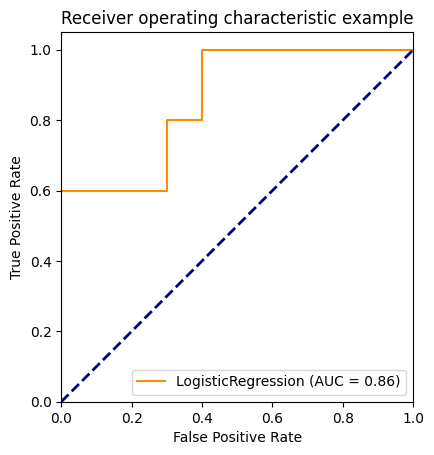

In [141]:
metrics.RocCurveDisplay.from_estimator(reg, X_test, Y_true, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()